In [5]:
import cv2 as cv
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [6]:
image_path = "./california_dreamin.jpg"

In [7]:
def showimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    #display(Image.fromarray(img_rgb))

def showgray(img_gray):
    plt.imshow(img_gray, cmap= "gray")
    plt.axis("off")

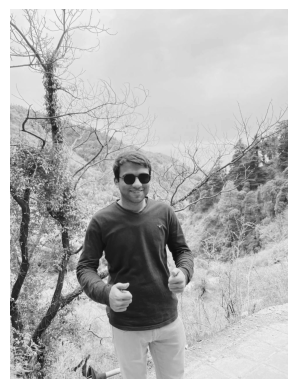

In [31]:
img_color = cv.imread(image_path)
img0 = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
showgray(img0)

In [13]:
img = cv.medianBlur(img0, 5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

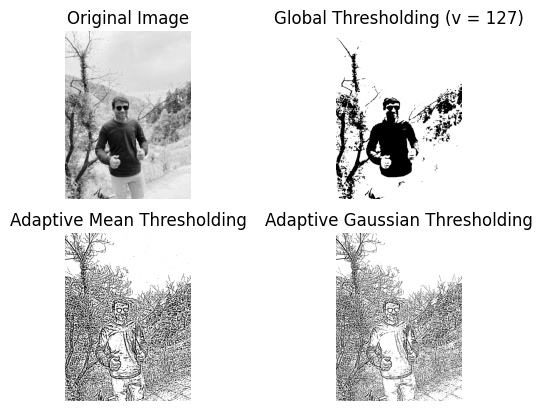

In [14]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1)
    showgray(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

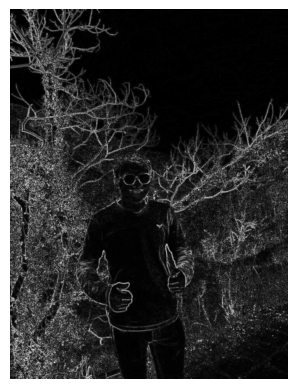

In [19]:
ddepth = cv.CV_16S
kernel_size = 3

# Remove noise by blurring with a Gaussian filter
img_gauss = cv.GaussianBlur(img0, (3, 3), 0)

# Apply Laplace function
dst = cv.Laplacian(img_gauss, ddepth, ksize=kernel_size)
abs_dst = cv.convertScaleAbs(dst)
showgray(abs_dst)

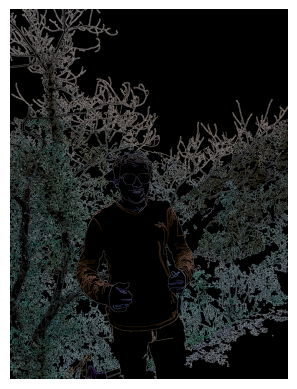

In [41]:
img_blur = cv.blur(img0, (3,3))
low_threshold =10
ratio = 20
kernel_size = 3
detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = img_color * (mask[:,:,None].astype(img0.dtype))
showgray(dst)

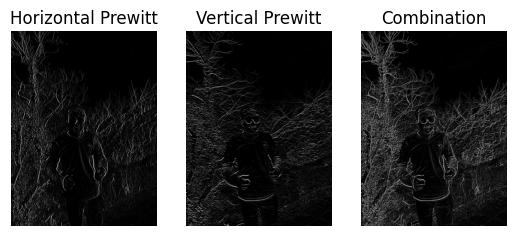

In [45]:
# Define the Prewitt kernels
horizontal_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
vertical_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply the Prewitt filter
horizontal_grad = cv2.filter2D(img_gauss, -1, horizontal_kernel)
vertical_grad = cv2.filter2D(img_gauss, -1, vertical_kernel)

# Combine the gradients (optional)
grad = np.sqrt(horizontal_grad**2 + vertical_grad**2)
grad_add = horizontal_grad + vertical_grad

titles = ['Horizontal Prewitt', 'Vertical Prewitt',
            'Combination']
images = [horizontal_grad, vertical_grad, grad_add]
 
for i in range(3):
    plt.subplot(1, 3, i+1)
    showgray(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

